,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.00000,0.472500,0.57000,0.95500,1.00000,0.87500,0.90000,0.90000,1.000,0.667,0.200,0.600,0.80000
GPT o4-mini,0.60000,1.000000,0.88400,0.90000,0.90000,0.86875,0.80850,0.90000,0.900,0.900,0.488,0.600,0.50625
GPT o3,0.60000,0.860000,1.00000,0.90000,1.00000,0.90000,0.90000,0.90000,0.900,0.900,0.500,0.500,0.50000
Claude 3.5 Sonnet,0.44800,0.406104,0.60000,1.00000,1.00000,0.90000,0.90000,0.90000,0.900,0.600,0.200,0.500,0.50000
Claude 3 Opus,0.10000,0.403360,0.40000,0.48000,1.00000,0.80000,0.87500,0.90000,0.852,0.400,0.100,0.500,0.50000
Llama 3.1 405b,0.30000,0.309430,0.40500,0.50900,0.80500,1.00000,0.96475,0.94625,0.976,0.600,0.200,0.600,0.56250
Llama 3.1 70b,0.24000,0.310508,0.30500,0.30500,0.50900,0.58000,1.00000,1.00000,0.600,0.500,0.200,0.600,0.60000
Llama 3.1 8b,0.20000,0.230092,0.30500,0.30500,0.30500,0.50000,0.50000,1.00000,0.500,0.500,0.100,0.100,0.17200
Grok 2,0.18000,0.102400,0.20000,0.60000,0.70000,0.50000,0.60000,0.60000,1.000,0.200,0.200,0.600,0.50000
Grok 3,0.60000,0.625160,0.62452,0.81652,0.81652,0.90000,0.90000,0.90000,0.900,1.000,0.312,0.500,0.50000


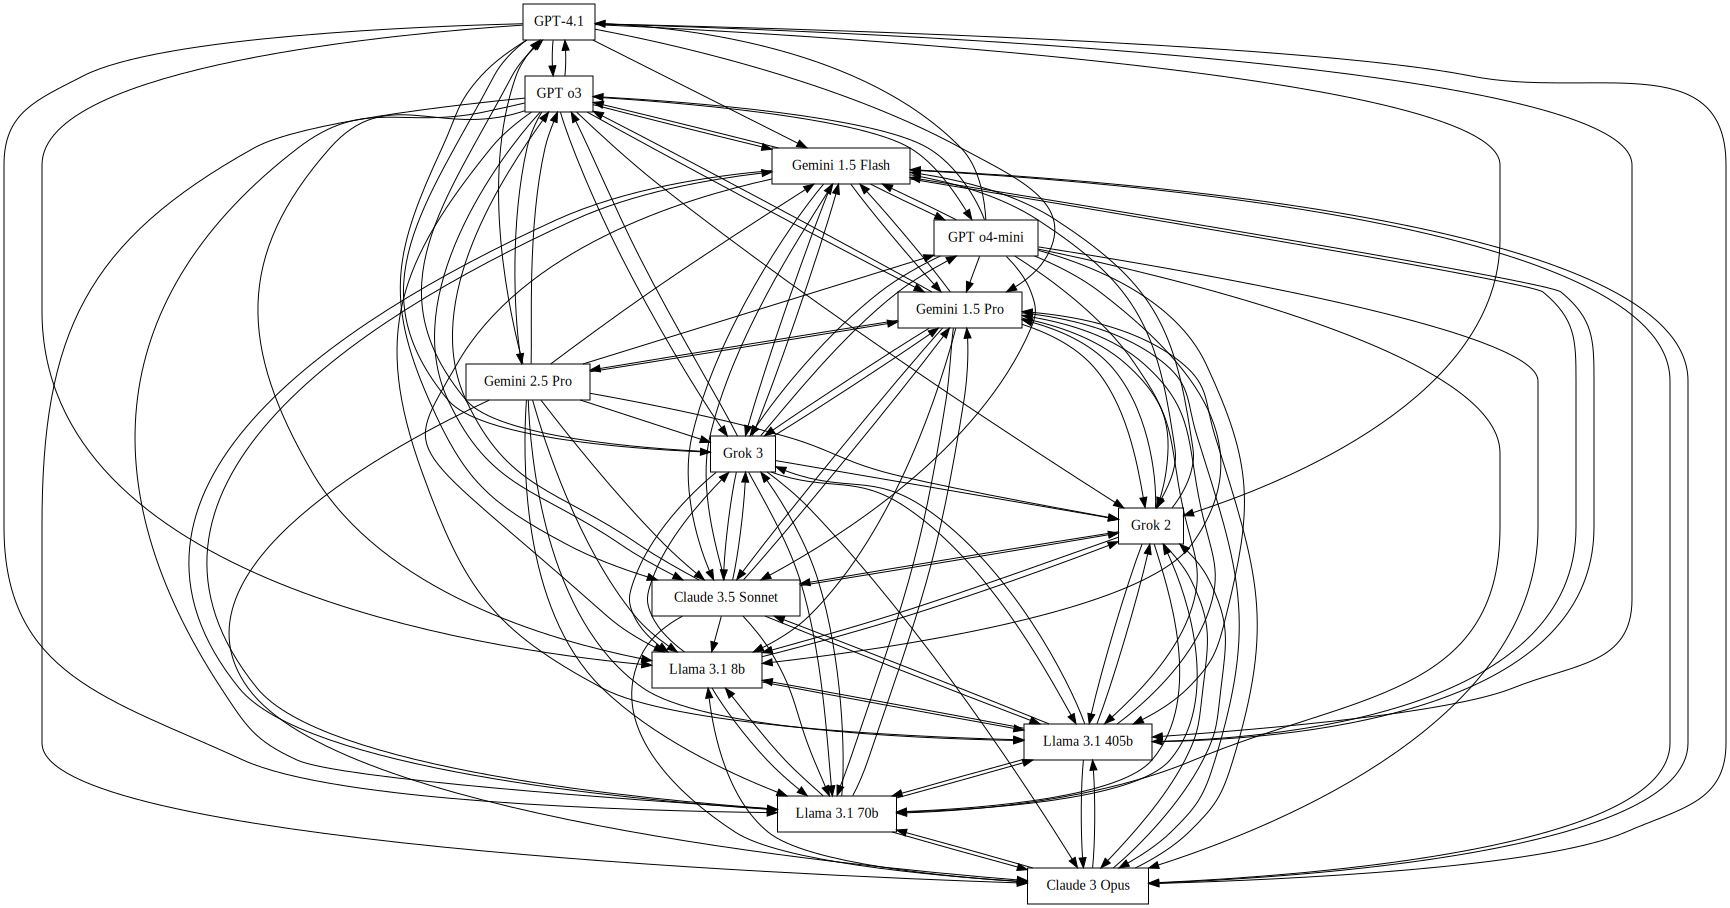

In [8]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

scales = {
    "Reasoning": QuantitativeScale(0, 100, PreferenceDirection.MAX),                # GPQA score (1 - 100)
    "Cost": QuantitativeScale(0, 50, PreferenceDirection.MIN),                      # Cost $ per 1M tokens
    "Context Window": QuantitativeScale(8000, 2000000, PreferenceDirection.MAX),    # Context Window in tokens
    "Multilingual": QuantitativeScale(0, 100, PreferenceDirection.MAX),             # Multilingual accuracy (1 - 100)
    "Speed": QuantitativeScale(2000, 4000000, PreferenceDirection.MAX)              # Speed in TPM
}

alternatives = [
    "GPT-4.1",               
    "GPT o4-mini",             
    "GPT o3",              
    "Claude 3.5 Sonnet",        
    "Claude 3 Opus",      
    "Llama 3.1 405b",       
    "Llama 3.1 70b",       
    "Llama 3.1 8b",              
    "Grok 2",           
    "Grok 3",            
    "Gemini 2.5 Pro",              
    "Gemini 1.5 Pro",               
    "Gemini 1.5 Flash"        
]


performance_data = [  
    # Reasoning, Cost, Context Window, Multilingual, Speed
    [66.3, 10, 1047576, 89.6, 30000],
    [77.6, 5.5, 200000, 80, 100000],
    [82.8, 50, 200000, 91.7, 30000],
    [59.4, 18, 200000, 92, 3052],
    [50.4, 90, 200000, 84.9, 1680],
    [50.7, 3.25, 128000, 91.6, 2215],
    [41.7, 0.84, 128000, 86.9, 2754],
    [30.4, 0.1, 128000, 68.9, 12546],
    [56, 12, 8192, 86.2, 1200],
    [75.4, 18, 131072, 91.2, 4320],
    [84, 17.5, 2000000, 74.4, 1000000],
    [46.2, 12.5, 2000000, 75.3, 4000000],
    [39.5, 0.75, 1000000, 74.1, 4000000]
]


# Indifference thresholds (q): minimal difference not noticed/preferred
q = {
    "Reasoning": 5.0,  
    "Cost": 1.0,       
    "Context Window": 20000,          
    "Multilingual": 1.5,             
    "Speed": 50000                  
}

# Preference thresholds (p): noticeable and preferred difference
p = {
    "Reasoning": 10.0,    
    "Cost": 5.0,       
    "Context Window": 100000,    
    "Multilingual": 3.5,              
    "Speed": 100000           
}

# Veto thresholds (v): unacceptable degradation even if others are good
v = {
    "Reasoning": 15.0,
    "Cost": 25.0,
    "Context Window": 500000,
    "Multilingual": 30.0,
    "Speed": 150000
}


criteria = {
    "Reasoning": 0.4,
    "Cost": 0.1,
    "Context Window": 0.3,
    "Multilingual": 0.1,
    "Speed": 0.1
}

performance_table = PerformanceTable(
    performance_data,
    alternatives=alternatives,
    criteria=criteria,
    scales=scales
)

electre3 = Electre3(
    criteria_weights=criteria,
    preference_thresholds=p,
    indifference_thresholds=q,
    veto_thresholds=v,
    alpha=0.3,
    beta=-0.15
)

# Generate matrices and rankings
concordance = electre3.concordance(performance_table)
display(concordance)

conc_mat_cut = concordance.where(concordance >= 0.5, 0)
AdjacencyMatrix(conc_mat_cut).plot()



In [9]:
discordance = electre3.discordance(performance_table)
display(discordance)

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,Reasoning 0 Cost 0 Contex...,Reasoning 0.26 Cost 0.00 ...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0000 Cost 0.0...,Reasoning 0.000 Cost 0.20...,Reasoning 0.000 Cost 0.24...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0000 Cost 0.2...
GPT o4-mini,Reasoning 0.000000 Cost 0...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000000 Cost 0...,Reasoning 0.000000 Cost 0...,Reasoning 0.00000 Cost 0....,Reasoning 0.00000 Cost 0....,Reasoning 0.000000 Cost 0...,Reasoning 0.00 Cost 0.02 ...,Reasoning 0.000000 Cost 0...,Reasoning 0.000000 Cost 0...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
GPT o3,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...
Claude 3.5 Sonnet,Reasoning 0.00 Cost 0.15 ...,Reasoning 1.000 Cost 0.37...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0000 Cost 0.4...,Reasoning 0.000 Cost 0.60...,Reasoning 0.000 Cost 0.64...,Reasoning 0.00 Cost 0.05 ...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0.000 Cost 0.02...,Reasoning 0.0000 Cost 0.6...
Claude 3 Opus,Reasoning 1.000000 Cost 1...,Reasoning 1 Cost 1 Contex...,Reasoning 1.000000 Cost 1...,Reasoning 0.000000 Cost 1...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000000 Cost 1...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 1.00000 Cost 1....,Reasoning 1 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...,Reasoning 0 Cost 1 Contex...
Llama 3.1 405b,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 70b,Reasoning 1 Cost 0 Contex...,Reasoning 1 Cost 0 Contex...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 0 Cost 0 Contex...,Reasoning 0.000000 Cost 0...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.86 Cost 0.00 ...,Reasoning 1.000000 Cost 0...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...
Llama 3.1 8b,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 0.26000 Cost 0....,Reasoning 0 Cost 0 Contex...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 1.000000 Cost 0...,Reasoning 0.000000 Cost 0...
Grok 2,Reasoning 0.06 Cost 0.00 ...,Reasoning 1.00000 Cost 0....,Reasoning 1.000000 Cost 0...,Reasoning 0.000000 Cost 0...,Reasoning 0.00000 Cost 0....,Reasoning 0.000000 Cost 0...,Reasoning 0.00000 Cost 0....,Reasoning 0.00000 Cost 0....,Reasoning 0 Cost 0 Contex...,Reasoning 1.000000 Cost 0...,Reasoning 1 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0000 Cost 0.3...
Grok 3,Reasoning 0.00 Cost 0.15 ...,Reasoning 0.000 Cost 0.37...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 0.0000 Cost 0.4...,Reasoning 0.000 Cost 0.60...,Reasoning 0.000 Cost 0.64...,Reasoning 0.00 Cost 0.05 ...,Reasoning 0 Cost 0 Contex...,Reasoning 0 Cost 0 Contex...,Reasoning 

,GPT-4.1,GPT o4-mini,GPT o3,Claude 3.5 Sonnet,Claude 3 Opus,Llama 3.1 405b,Llama 3.1 70b,Llama 3.1 8b,Grok 2,Grok 3,Gemini 2.5 Pro,Gemini 1.5 Pro,Gemini 1.5 Flash
GPT-4.1,1.0,0.47250,0.00000,0.95500,1.00000,0.875000,0.90000,0.90000,1.000,0.667,0.0,0.0,0.0
GPT o4-mini,0.0,1.00000,0.88400,0.90000,0.90000,0.868750,0.80850,0.90000,0.900,0.900,0.0,0.0,0.0
GPT o3,0.0,0.00000,1.00000,0.00000,1.00000,0.000000,0.00000,0.00000,0.000,0.000,0.0,0.0,0.0
Claude 3.5 Sonnet,0.0,0.00000,0.00000,1.00000,1.00000,0.900000,0.90000,0.90000,0.900,0.000,0.0,0.0,0.0
Claude 3 Opus,0.0,0.00000,0.00000,0.00000,1.00000,0.000000,0.00000,0.00000,0.000,0.000,0.0,0.0,0.0
Llama 3.1 405b,0.0,0.00000,0.00000,0.50900,0.80500,1.000000,0.96475,0.94625,0.976,0.000,0.0,0.0,0.0
Llama 3.1 70b,0.0,0.00000,0.00000,0.00000,0.50900,0.580000,1.00000,1.00000,0.210,0.000,0.0,0.0,0.0
Llama 3.1 8b,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.45283,1.00000,0.000,0.000,0.0,0.0,0.0
Grok 2,0.0,0.00000,0.00000,0.60000,0.70000,0.500000,0.60000,0.60000,1.000,0.000,0.0,0.0,0.0
Grok 3,0.0,0.62516,0.62452,0.81652,0.81652,0.900000,0.90000,0.90000,0.900,1.000,0.0,0.0,0.0


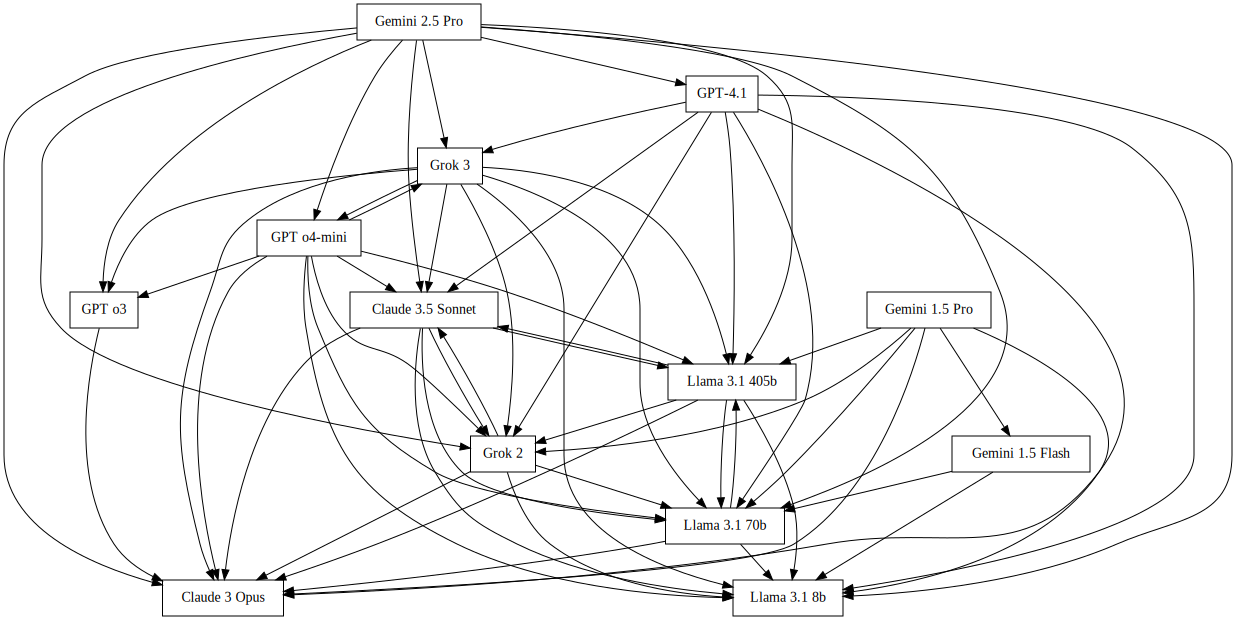

In [10]:
credibility = electre3.construct(performance_table)
display(credibility)

cred_mat_cut = credibility.where(credibility > 0.5, 0)
AdjacencyMatrix(cred_mat_cut).plot()

Ascending Distillation: [['GPT-4.1', 'GPT o4-mini', 'Gemini 2.5 Pro', 'Gemini 1.5 Pro'], ['Gemini 1.5 Flash'], ['GPT o3', 'Grok 3'], ['Claude 3.5 Sonnet'], ['Llama 3.1 405b'], ['Llama 3.1 70b', 'Grok 2'], ['Claude 3 Opus'], ['Llama 3.1 8b']]
[['GPT-4.1', 'GPT o4-mini', 'Gemini 2.5 Pro', 'Gemini 1.5 Pro'], ['Gemini 1.5 Flash'], ['GPT o3', 'Grok 3'], ['Claude 3.5 Sonnet'], ['Llama 3.1 405b'], ['Llama 3.1 70b', 'Grok 2'], ['Claude 3 Opus'], ['Llama 3.1 8b']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

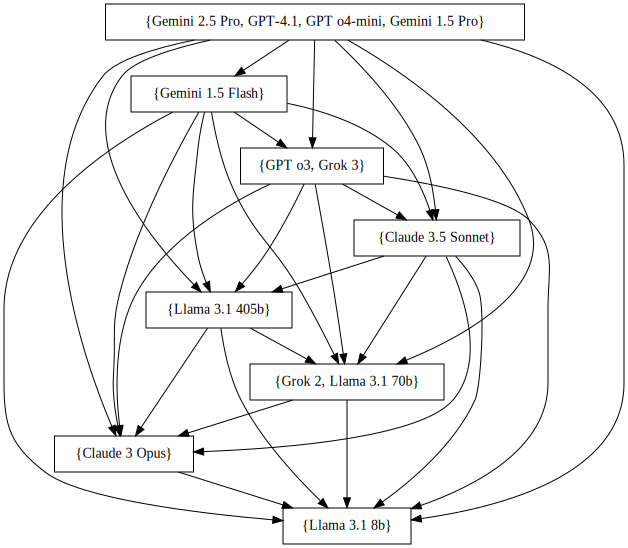

In [11]:
ascending = electre3.distillation(cred_mat_cut, ascending=True)
print("Ascending Distillation:", ascending)
OutrankingMatrix.from_ranked_categories(ascending).graph_condensation.plot()

print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

[['GPT o4-mini'], ['GPT-4.1'], ['Gemini 2.5 Pro'], ['Claude 3.5 Sonnet'], ['Grok 3'], ['Llama 3.1 405b', 'Gemini 1.5 Pro'], ['Gemini 1.5 Flash'], ['GPT o3', 'Llama 3.1 70b'], ['Claude 3 Opus', 'Llama 3.1 8b', 'Grok 2']]


/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_matrix.iloc[component_a, component_b] = (
/home/user/anaconda3/envs/mcdss/lib/python3.13/site-packages/mcda/core/matrices.py:208: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast 

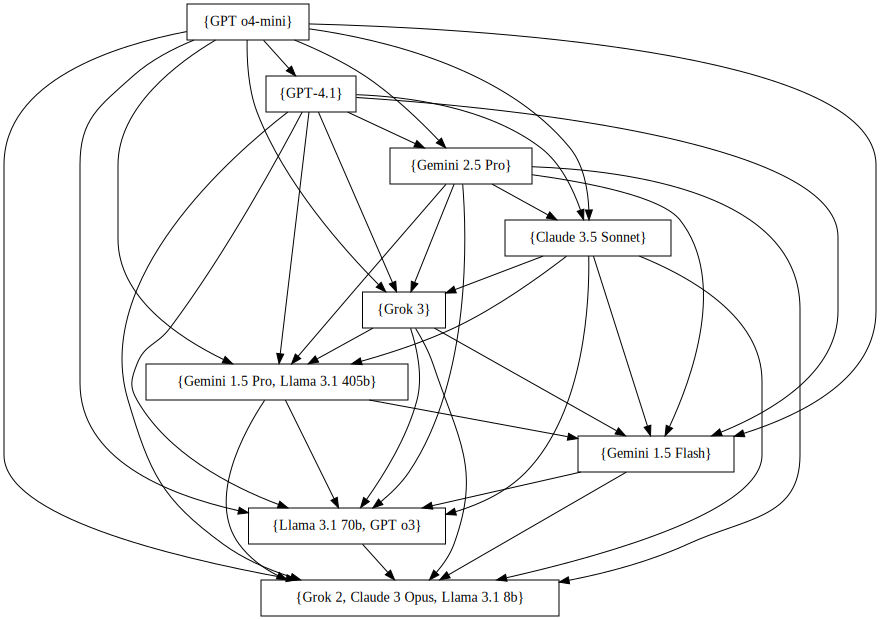

In [12]:
descending = electre3.distillation(cred_mat_cut, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

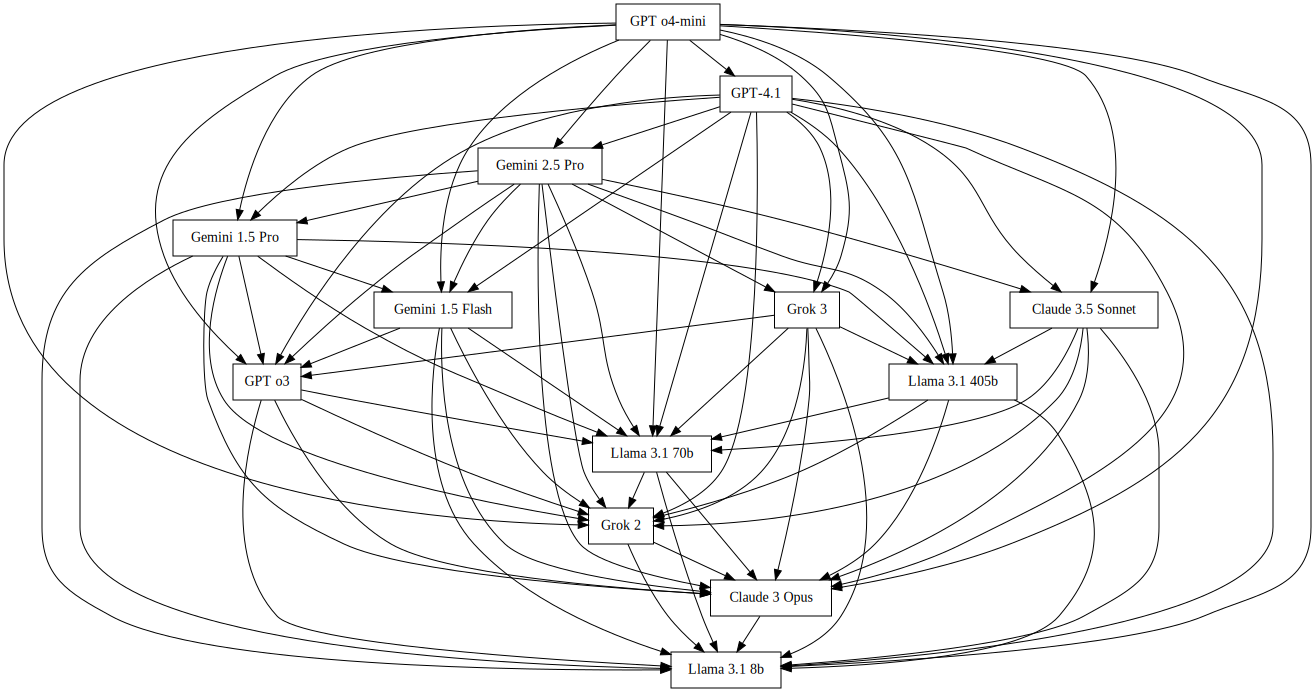

In [13]:
ranking = electre3.exploit(cred_mat_cut)
ranking.graph_condensation.plot()

In [14]:
qualification = electre3.qualification(cred_mat_cut)
print(qualification)

GPT-4.1              6
GPT o4-mini          7
GPT o3              -1
Claude 3.5 Sonnet    2
Claude 3 Opus       -6
Llama 3.1 405b      -1
Llama 3.1 70b       -4
Llama 3.1 8b        -9
Grok 2              -5
Grok 3               2
Gemini 2.5 Pro       5
Gemini 1.5 Pro       3
Gemini 1.5 Flash     1
dtype: int64
